<a href="https://colab.research.google.com/github/gaurika05/Neural_Networks_Deep_Learning/blob/main/pytorch_ANN_improvised(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
# to train model
from sklearn.model_selection import train_test_split

In [ ]:
data,target = make_circles(n_samples=1000, noise=0.03)

In [ ]:
data[:5]

array([[ 0.24086294,  0.80228553],
       [-0.86455236,  0.06126039],
       [ 0.58219921, -0.56973214],
       [-0.36942717,  0.73171411],
       [ 0.53364092,  0.53687276]])

In [ ]:
target[:5]

array([1, 1, 1, 1, 1])

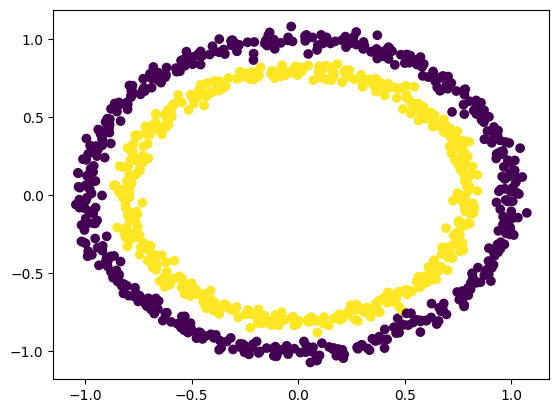

In [ ]:
plt.scatter(data[:, 0],data[:,1],c = target)
plt.show()

In [ ]:
# since torch can't work on numpy array hence need to convert to tensor object
X = torch.from_numpy(data).type(torch.float)
y= torch.from_numpy(target).type(torch.float)

In [ ]:
# we apply deep learning on training data and then tes our model on testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
X.shape

torch.Size([1000, 2])

In [ ]:
X_train.shape

torch.Size([750, 2])

In [ ]:
# Build model

In [ ]:
# setup GPU for deep learning model
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cpu'

In [ ]:
#nn.Module is a parent class of our Model class
class Model(nn.Module):
  # self similar to a keyword used to specify a deafult argument
  # __init__ constructor of class (double underscore)(double underscore before and after in python methods)
  def __init__(self):
    # calling parent class constructor
    super().__init__()
    # create input layer
    # in_features - input neurons in our input layer
    # out_features - hidden layer neurons that is connected with input layer
    # nn.Linear - it applies linear equation : x.w + bias
    self.layer_1 = nn.Linear(in_features=2, out_features=6)
    self.layer_2 = nn.Linear(in_features=6, out_features=6)
    self.layer_3 = nn.Linear(in_features=6, out_features=1)
    self.activation = nn.ReLU()

  def forward(self, input_data):
    # input_data -> input layer to network
    # first we pass our input data to forward method
    # then layer_1 will receive input data
    # then we pass layer_1 output to layer_2
    # then we return output that is coming out from layer_2
    x = self.activation(self.layer_1(input_data))
    x = self.activation(self.layer_2(x))
    return self.layer_3(x)

    # model created

In [ ]:
model = Model().to(device) # re-initialize step

In [ ]:
model

Model(
  (layer_1): Linear(in_features=2, out_features=6, bias=True)
  (layer_2): Linear(in_features=6, out_features=6, bias=True)
  (layer_3): Linear(in_features=6, out_features=1, bias=True)
  (activation): ReLU()
)

In [ ]:
# another strategy to build a model
model_2 = nn.Sequential(
    nn.Linear(in_features=2, out_features=4),
    nn.Linear(in_features=4, out_features=1)
).to(device)


In [ ]:
model_2

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
# Backpropagation
  # Loss function
    # Binary Cross Entropy
    # Cross Entropy
    # MAE - Mean Absolute Error

  # Optimization
    # Stochastic Gradient Descent
    # Adam Optimizer

In [ ]:
# we are using Binary Cross Entropy Loss Function
loss = nn.BCEWithLogitsLoss()

# optimization technique - Stochastic Gradient
# params - trainable parametrs - weights and bias
# lr - learning rate

##optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(params = model.parameters(), lr=0.1)

In [ ]:
# Evaluation metric
def accuracy(y_true,y_pred):
  # y_true = 1, y_pred = 1
  # y_true = 0, y_pred = 0
  correct_classification = torch.eq(y_true,y_pred).sum().item()
  acc = (correct_classification / len(y_pred)) * 100
  return acc

In [ ]:
#here we are calling forward method of our model without training the model
y_logits = model(X_test)[:5]


In [ ]:
y_logits

tensor([[-0.1216],
        [ 0.0751],
        [ 0.0512],
        [ 0.0707],
        [-0.0218]], grad_fn=<SliceBackward0>)

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)

In [ ]:
y_pred_probs#(predicted probability in 0 to 1 scale)

tensor([[0.4696],
        [0.5188],
        [0.5128],
        [0.5177],
        [0.4945]], grad_fn=<SigmoidBackward0>)

In [ ]:
y_pred = torch.round(y_pred_probs) # round off predicted probabaility

In [ ]:
y_pred

tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.]], grad_fn=<RoundBackward0>)

In [ ]:
y_test[:5]

tensor([0., 1., 1., 0., 0.])

In [ ]:
# y_pred earlier coming as 2d convert to 1d

In [ ]:
# squeezed to convert to 1d
y_pred = y_pred.squeeze()

In [ ]:
y_pred

tensor([0., 1., 1., 1., 0.], grad_fn=<SqueezeBackward0>)

In [ ]:
accuracy(y_test[:5], y_pred)

80.0

In [ ]:
epochs = 1000
# data converted to cpu
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # training model
  model.train()

  # apply feedforward
  y_logits = model(X_train).squeeze()
  # get predictions on training data
  y_pred = torch.round(torch.sigmoid(y_logits))

  # now find out loss
  train_loss = loss(y_logits, y_train)
  acc = accuracy(y_train, y_pred)

  # apply optimization - apply gradient descent
  optimizer.zero_grad()

  # backpropagation
  train_loss.backward()

  # again step up (use of learning rate to be applied)
  optimizer.step()

  # model evaluation
  model.eval()

  with torch.inference_mode():
    y_pred_test = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(y_pred_test))
    test_loss = loss(y_pred_test, y_test)
    test_acc = accuracy(y_test, test_pred)
    if epoch % 100 ==0:
      print(f" Epoch : {epoch} | Loss : {train_loss:.4f} | Acc : {acc:.2f} | Test Loss : {test_loss:.4f} | Test Acc : {test_acc:.2f}")
    #2f -> till 2 digits


 Epoch : 0 | Loss : 0.6865 | Acc : 51.07 | Test Loss : 0.6827 | Test Acc : 51.60
 Epoch : 100 | Loss : 0.0154 | Acc : 99.73 | Test Loss : 0.0096 | Test Acc : 99.60
 Epoch : 200 | Loss : 0.3608 | Acc : 82.53 | Test Loss : 0.4235 | Test Acc : 81.20
 Epoch : 300 | Loss : 0.0216 | Acc : 99.73 | Test Loss : 0.0190 | Test Acc : 99.60
 Epoch : 400 | Loss : 0.0161 | Acc : 99.73 | Test Loss : 0.0159 | Test Acc : 99.60
 Epoch : 500 | Loss : 0.0129 | Acc : 99.73 | Test Loss : 0.0138 | Test Acc : 99.60
 Epoch : 600 | Loss : 0.0107 | Acc : 99.73 | Test Loss : 0.0123 | Test Acc : 99.60
 Epoch : 700 | Loss : 0.0091 | Acc : 99.73 | Test Loss : 0.0107 | Test Acc : 99.60
 Epoch : 800 | Loss : 0.0078 | Acc : 99.87 | Test Loss : 0.0091 | Test Acc : 99.60
 Epoch : 900 | Loss : 0.0068 | Acc : 99.87 | Test Loss : 0.0070 | Test Acc : 99.60


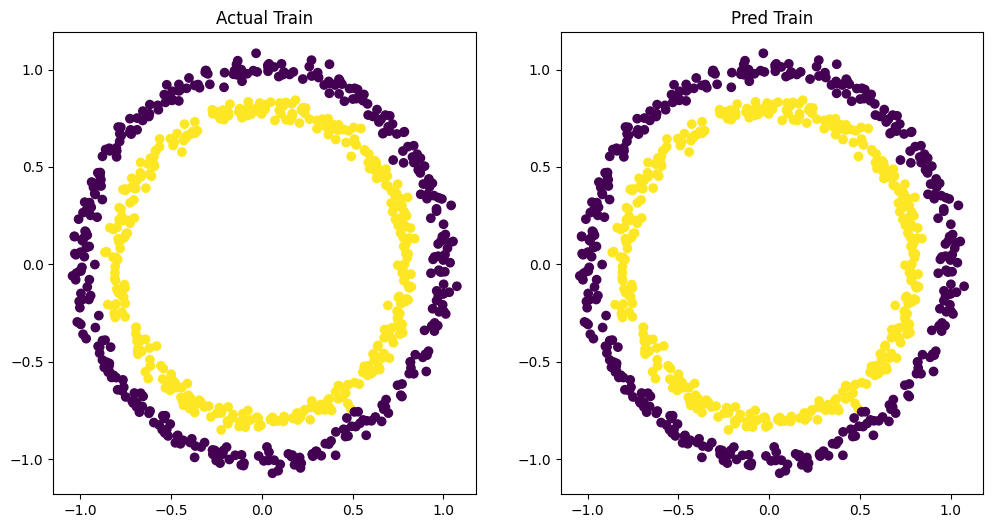

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Actual Train")
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.subplot(1,2,2)
plt.title("Pred Train")
plt.scatter(X_train[:,0],X_train[:,1], c=y_pred.detach().numpy())
plt.show()

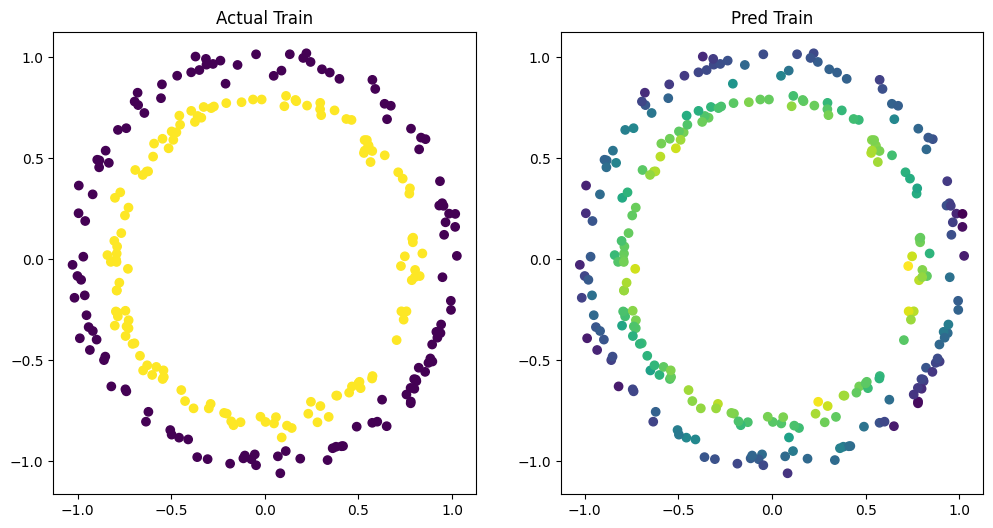

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Actual Train")
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.subplot(1,2,2)
plt.title("Pred Train")
plt.scatter(X_test[:,0],X_test[:,1], c=y_pred_test.detach().numpy())
plt.show()